In [1]:
import numpy as np
import matplotlib.pyplot as plt
from NumOpt.functions import beanFunction
from NumOpt.OptimizationProblem import OptimizationProblem

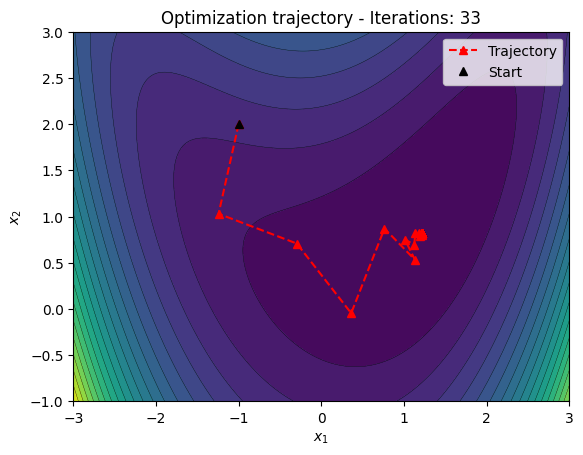

In [2]:
prob = OptimizationProblem(nDim=2, bounds=[(-3.0, 3.0), (-1.0, 3.0)])
prob.setObjectiveFunction(beanFunction)
history = prob.solve(x0=[-1.0, 2.0], directionMethod='steepest_descent', stepMethod='backtracking', options={'maxIter':500, 'tol':1e-6})
prob.plotSolutionHistory(history)